# 🔎 Análisis exploratorio: 🏃🏻‍➡️ Life Style Data 

## 1️⃣ **Entender el contexto del proyecto**

El análisis exploratorio que se va a realizar es sobre el dataset **Life Style Data**, el cuál puedes encontrar en el siguiente enlace:
🔗[https://www.kaggle.com/datasets/jockeroika/life-style-data](https://www.kaggle.com/datasets/jockeroika/life-style-data)

---

### 🎯 **Objetivo del análisis**

El propósito de este análisis es **explorar y comprender cómo los hábitos de vida, la alimentación y la actividad física influyen en distintos indicadores de salud y rendimiento físico**.  

A través de un análisis exploratorio detallado, se pretende:
- Identificar patrones generales en los datos relacionados con el estilo de vida de los participantes.  
- Evaluar la relación entre variables como la frecuencia de ejercicio, la dieta, el IMC y el consumo calórico.  
- Detectar posibles valores atípicos o inconsistencias en los datos que puedan afectar el modelado posterior.  
- Preparar el dataset para aplicar modelos predictivos que permitan **estimar indicadores de salud o rendimiento físico** (por ejemplo, las calorías quemadas o el porcentaje de grasa corporal).  

Además, en etapas posteriores se implementarán técnicas de **regresión lineal (simple y múltiple)**, **regularización (Ridge y Lasso)**, y **modelos de aprendizaje automático basados en árboles de decisión y ensambles (Random Forest y Gradient Boosting)** para comparar su rendimiento y capacidad predictiva.

En conjunto, este proyecto busca **extraer información útil y visualmente comprensible** sobre los factores que contribuyen a un estilo de vida saludable, apoyando la toma de decisiones y el diseño de rutinas personalizadas.

---

### 🧩 **Significado de las variables**

| **Columna** | **Descripción** |
|--------------|----------------|
| `Age` | Edad del participante (en años). |
| `Gender` | Género biológico (Masculino/Femenino). |
| `Weight (kg)` | Peso del individuo en kilogramos. |
| `Height (m)` | Altura del individuo en metros. |
| `Max_BPM` | Frecuencia cardíaca máxima registrada durante una sesión de ejercicio. |
| `Avg_BPM` | Frecuencia cardíaca promedio mantenida durante la sesión. |
| `Resting_BPM` | Frecuencia cardíaca en reposo antes de iniciar el entrenamiento. |
| `Session_Duration (hours)` | Duración de la sesión de ejercicio, en horas. |
| `Calories_Burned` | Total de calorías quemadas durante la sesión. |
| `Workout_Type` | Tipo de entrenamiento realizado (por ejemplo: fuerza, HIIT, cardio). |
| `Fat_Percentage` | Porcentaje de grasa corporal del individuo. |
| `Water_Intake (liters)` | Promedio diario de consumo de agua, en litros. |
| `Workout_Frequency (days/week)` | Número de días de entrenamiento por semana. |
| `Experience_Level` | Nivel de experiencia física (1 = Principiante, 2 = Intermedio, 3 = Avanzado). |
| `BMI` | Índice de Masa Corporal (IMC), medida de grasa corporal basada en peso y altura. |
| `Daily meals frequency` | Número de comidas consumidas diariamente. |
| `Physical exercise` | Indica el tipo o la frecuencia de la actividad física realizada. |
| `Carbs` | Consumo diario de carbohidratos (en gramos). |
| `Proteins` | Consumo diario de proteínas (en gramos). |
| `Fats` | Consumo diario de grasas (en gramos). |
| `Calories` | Total de calorías ingeridas a través de la alimentación diaria. |
| `meal_name` | Nombre de la comida (por ejemplo: desayuno, almuerzo, cena). |
| `meal_type` | Tipo de comida (por ejemplo: snack, plato principal, bebida). |
| `diet_type` | Tipo de dieta seguida (por ejemplo: cetogénica, vegana, equilibrada). |
| `sugar_g` | Contenido de azúcar en gramos por comida. |
| `sodium_mg` | Contenido de sodio en miligramos por comida. |
| `cholesterol_mg` | Contenido de colesterol en miligramos por comida. |
| `serving_size_g` | Tamaño de la porción del alimento en gramos. |
| `cooking_method` | Método de cocción utilizado (por ejemplo: hervido, frito, a la parrilla). |
| `prep_time_min` | Tiempo de preparación de la comida, en minutos. |
| `cook_time_min` | Tiempo de cocción de la comida, en minutos. |
| `rating` | Valoración de la comida o entrenamiento (escala de 1 a 5). |
| `Name of Exercise` | Nombre del ejercicio realizado. |
| `Sets` | Número de series completadas en el ejercicio. |
| `Reps` | Número de repeticiones por serie. |
| `Benefit` | Descripción del beneficio físico del ejercicio. |
| `Burns Calories (per 30 min)` | Calorías estimadas que se queman en 30 minutos de ese ejercicio. |
| `Target Muscle Group` | Grupo muscular principal trabajado en el ejercicio. |
| `Equipment Needed` | Equipamiento necesario para realizar el ejercicio. |
| `Difficulty Level` | Nivel de dificultad del ejercicio (Principiante, Intermedio, Avanzado). |
| `Body Part` | Parte del cuerpo principalmente involucrada (por ejemplo: brazos, piernas, pecho). |
| `Type of Muscle` | Tipo de músculo implicado (por ejemplo: superior, core, fuerza de agarre). |
| `Workout` | Nombre específico del entrenamiento o ejercicio. |

---

🗒️ *Fuente de los datos: Kaggle - Global Coffee Health Dataset (2024)*  

---

Lo primero de todo, será importar todas las librerías que vayamos a usar para realizar el análisis

In [166]:
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
warnings.filterwarnings('ignore')


## 2️⃣ **Análisis descriptivo inicial**

Antes de comenzar con el análisis y la limpieza de datos, realizamos un **análisis descriptivo inicial** del dataset con el objetivo de conocer su estructura, tamaño y el tipo de información que contiene.

Este paso nos permite identificar el número de registros disponibles, las columnas existentes y obtener una primera impresión sobre la distribución general de los datos.

In [167]:
# Cargar el dataset
df = pd.read_csv("data/life_style_data.csv")

Mostraremos la cantidad total de filas de nuestro dataset y todas las columnas que contiene para hacernos una idea de los datos que tenemos

In [168]:
# Mostrar la cantidad total de filas y columnas del dataset
print(f"🌍 Total de filas del dataset: {len(df)}\n------------------------------------------------------------------------------")
print(df.columns)

🌍 Total de filas del dataset: 20000
------------------------------------------------------------------------------
Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'exp

Mostramos también los datos que contienen las primeras 5 filas

In [169]:
print("\n🔎 Primeras 5 filas del dataset:\n")
print(df.head())


🔎 Primeras 5 filas del dataset:

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624

Por último, mostramos las estadísticas básicas de cada columna (cantidad total de filas, mediana, mínimo, máximo, 25%, 50%, 70%)

In [170]:
print("\n📊 Estadísticas descriptivas:\n")
print(df.describe())


📊 Estadísticas descriptivas:

                Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851454     73.898832      1.723094    179.889702    143.704306   
std       12.114580     21.173010      0.127033     11.510805     14.267688   
min       18.000000     39.180000      1.490000    159.310000    119.070000   
25%       28.170000     58.160000      1.620000    170.057500    131.220000   
50%       39.865000     70.000000      1.710000    180.140000    142.990000   
75%       49.630000     86.100000      1.800000    189.425000    156.060000   
max       59.670000    130.770000      2.010000    199.640000    169.840000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  20000.000000              20000.000000     20000.000000   
mean      62.195813                  1.259446      1280.109601   
std        7.289351                  0.341336       502.228

## 3️⃣ **Detección y tratamiento datos ausentes**

Antes de proceder con el análisis exploratorio y la creación de nuevas variables, es fundamental **verificar la existencia de valores nulos o ausentes** en el dataset.  

La presencia de datos faltantes puede afectar la precisión de los resultados, alterar las estadísticas descriptivas y comprometer el rendimiento de los modelos predictivos.  

Por ello, en esta sección se realiza una revisión general para comprobar si existen columnas o registros con valores nulos que deban ser tratados o imputados.

In [171]:
total_nulos = df.isnull().sum()
print(total_nulos)

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

Tras ejecutar el análisis, se observa que ninguna de las columnas contiene valores nulos.

Esto indica que el dataset está completo y no requiere imputación ni eliminación de registros, por lo que se puede continuar con el análisis exploratorio sin necesidad de realizar tratamientos adicionales sobre los datos faltantes.

## 4️⃣ **Revisar los tipos de las variables**

Una vez verificada la integridad de los datos, el siguiente paso consiste en **revisar los tipos de las variables** para asegurarnos de que cada columna tenga el formato adecuado según el tipo de información que representa.

Este proceso es fundamental para evitar errores en los cálculos posteriores y garantizar que las operaciones estadísticas o de modelado se apliquen correctamente.  

In [172]:
# Mostramos un resumen de los tipos de datos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

En este caso, hemos detectado algunas columnas que con formato decimal cuando deberían ser un número entero, por lo que convertiremos esas columnas para el correcto tratamiento de los datos.

Las columnas que vamos a convertir a número entero son: Workout_Frequency, Experience_level y Daily meals frequency.

El motivo para convertir estas columnas entero, son que, por ejemplo en el caso de `Workout_Frequency`, lo que representa es el número de días que la persona entrena por semana, no tiene sentido entrenar 3.6 días a la semana.

Por otro lado, en el caso de `Experience_Level` lo que representa es el nivel de experiencia física (1 = Principiante, 2 = Intermedio, 3 = Avanzado), son etiquéticas numéricas, por lo que no tiene sentido que sean float.

Por último, la variable `Daily meal frequency` representa el número de comidas, al igual que ocurre con `Workout_Frequency`, es uin conteo de comidas, 4 comidas, 5 comidas, no tiene sentido que nadie coma 4.3 veces al día.

In [173]:
df['Workout_Frequency'] = df['Workout_Frequency (days/week)'].astype(int)
df['Experience_Level'] = df['Experience_Level'].astype(int)
# df['Daily meals frequency'] = df['Daily meals frequency'].astype(int)

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,Workout_Frequency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,3
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,4
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,2
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,3
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,4


## 5️⃣ **Identificación y tratamiento de datos atípicos**

En esta sección se lleva a cabo la identificación y análisis de posibles valores atípicos presentes en el dataset. Los outliers pueden deberse a errores de registro, inconsistencias en la carga de datos o simplemente reflejar casos extremos pero reales dentro de la población.

El objetivo es verificar la coherencia y plausibilidad de los datos, asegurando que las observaciones sean consistentes con la realidad del contexto físico y nutricional que se analiza.

Para este proceso se utilizó principalmente el método `describe()`, que permite obtener estadísticas descriptivas básicas como los valores `mínimos`, `máximos`, `medias`, `medianas` y `percentiles`. Gracias a ello, se pudieron detectar valores que inicialmente podrían parecer extremos.

No obstante, en lugar de eliminarlos directamente, se realizó una revisión contextual comparando variables relacionadas —por ejemplo, la relación entre el peso, la altura y las calorías quemadas durante una sesión— para determinar si los valores eran coherentes desde un punto de vista fisiológico.

Este enfoque permite distinguir entre errores reales y casos válidos, evitando eliminar información relevante y manteniendo la integridad del dataset para el análisis posterior.

In [174]:
# Usamos la función describe para evaluar de forma rápida si hay algún valor atípico en nuestro dataset
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Workout_Frequency
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,38.851454,73.898832,1.723094,179.889702,143.704306,62.195813,1.259446,1280.109601,26.101313,2.627486,...,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19,2.922700
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19,1.033382
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16,1.000000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19,2.000000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19,3.000000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20,4.000000
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20,5.000000


Si analizamos los datos que nos reporta el método `describe()`, observamos algunos valores que en un primer momento podrían parecer atípicos, como el máximo de calorías quemadas por sesión (`Calories_Burned` = 2890.82 kcal).

Sin embargo, al revisar conjuntamente las columnas de altura y peso, comprobamos que los valores máximos registrados (`Height` = 2.01 m, `Weight` = 130.77 kg) corresponden a individuos con una complexión grande.

Esto tiene sentido desde el punto de vista fisiológico, ya que una persona más alta y con mayor masa corporal consume más energía durante el ejercicio, incluso realizando la misma actividad que alguien más pequeño.

Además, el análisis de la variable `Experience_Level` muestra que la mayoría de participantes se encuentran entre los niveles 1 y 2 (principiante e intermedio), lo que sugiere que el gasto calórico elevado puede deberse también a menor eficiencia en la ejecución del ejercicio, ya que las personas con menos experiencia tienden a gastar más energía para mantener la misma intensidad.

Por tanto, estos valores altos de calorías no se consideran errores ni outliers anómalos, sino variaciones naturales explicadas por las características físicas y el nivel de experiencia de los individuos.

---

Durante la exploración inicial del dataset, se identificaron algunas columnas cuyos valores no coincidían con la descripción oficial proporcionada por la fuente del conjunto de datos, o bien no aportaban información relevante para el análisis.
Este proceso de revisión tiene como objetivo garantizar la calidad y consistencia semántica de las variables, eliminando aquellas que puedan inducir ruido o confusión en los resultados posteriores.

En concreto:

- La columna `meal_name` se eliminó porque todos sus valores corresponden al término "Other", a pesar de que la descripción oficial indica que debería contener nombres de comidas como Breakfast, Lunch o Dinner. Al no aportar variabilidad ni información útil, esta variable se descartó.

- La columna `Physical exercise` fue removida tras comprobar que sus valores numéricos (por ejemplo, -0.04, 0.97, 3.0) no se ajustaban a la descripción original (“indica el tipo o la frecuencia de actividad física”), lo que sugiere un error en la codificación o carga de datos.

Estas eliminaciones permiten mantener la coherencia entre el significado teórico de las variables y los datos reales presentes en el dataset, mejorando la fiabilidad del análisis posterior.

In [175]:
print((f"Total columnas antes de la limpieza: {len(df.columns)}"))

# Creamos un nuevo DataFrame sin las columnas que no son útiles
# df = df.drop(['meal_name','Physical exercise'], axis=1)

# Mostramos de nuevo las 4 primeras filas para verificar que está todo correcto
print((f"Total columnas después de la limpieza: {len(df.columns)}"))

Total columnas antes de la limpieza: 55
Total columnas después de la limpieza: 55


## 6️⃣ **Creación de variables derivadas o auxiliares**

Tras la fase de limpieza y verificación de datos, hemos decidido **crear una serie de variables auxiliares** para enriquecer el análisis y obtener una visión más completa sobre los factores relacionados con el **rendimiento físico, la nutrición y la condición corporal** de los participantes.  

El objetivo principal de este apartado es **aprovechar la información ya existente** en el dataset para generar nuevos indicadores que nos ayuden a interpretar mejor los resultados, detectar patrones y facilitar el análisis de correlaciones en fases posteriores.  

Estas variables combinan datos de distintas columnas originales y nos permiten comparar de manera más justa el desempeño entre personas con características físicas diferentes. A continuación, se describen las nuevas variables creadas:

- **`HRR (Heart Rate Reserve)`**: calcula la **reserva de frecuencia cardíaca**, es decir, la diferencia entre la frecuencia máxima y la frecuencia en reposo (`Max_BPM - Resting_BPM`). Este valor refleja la capacidad cardiovascular de cada individuo: cuanto mayor sea el HRR, mejor condición física suele tener la persona.

- **`Relative intensity`**: mide el **nivel de esfuerzo relativo** durante la sesión utilizando la **fórmula de Karvonen**, un método ampliamente utilizado para calcular la intensidad del ejercicio en función de la frecuencia cardíaca individual. Se obtiene mediante la expresión  **`(Avg_BPM - Resting_BPM) / HRR`**,  donde `HRR` representa la reserva de frecuencia cardíaca. Este valor refleja el **porcentaje de la capacidad cardiovascular utilizada** durante la sesión: cuanto más alto es el resultado, mayor es la intensidad del esfuerzo realizado en relación con el máximo potencial del individuo.

- **`Calories/hour`**: representa la **intensidad del entrenamiento** expresada en calorías quemadas por hora (`Calories_Burned / Session_Duration (hours)`). Esta métrica permite comparar el esfuerzo entre sesiones de distinta duración de manera más equitativa.

- **`Macronutrient ratios`**: muestra la **proporción de carbohidratos, proteínas y grasas** respecto al total de calorías ingeridas. Para calcularlo se asume que los carbohidratos y proteínas aportan 4 kcal/g y las grasas 9 kcal/g. Estos porcentajes ayudan a entender la calidad nutricional de la dieta de cada individuo.

- **`Weekly training load`**: estima la **carga total de entrenamiento semanal**, combinando la frecuencia y la duración media de las sesiones (`Workout_Frequency * Session_Duration`). Cuanto mayor sea este valor, mayor es el volumen de entrenamiento acumulado en la semana.

- **`Approximate energy balance`**: mide el **balance energético diario aproximado** restando las calorías quemadas de las calorías ingeridas (`Calories - Calories_Burned`). Un valor positivo indica superávit calórico (ingesta mayor al gasto), mientras que un valor negativo indica déficit calórico.

La creación de estas variables nos permite **profundizar en el análisis exploratorio y predictivo**, ofreciendo una visión más contextualizada del rendimiento físico y los hábitos de los participantes. Gracias a estos nuevos indicadores, podremos identificar relaciones más precisas entre el entrenamiento, la dieta y los resultados fisiológicos.

In [176]:
# Reserva de frecuencia cardíaca (FCR)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']

# Intensidad relativa
# Usamos la fómrula de Karvonen que es un método eficaz para calcular nuestras zonas de entrenamiento por frecuencia cardíaca
df['Relative_Intensity'] = (df['Avg_BPM'] - df['Resting_BPM']) / df['HRR']

# Calorías por hora (intensidad de entrenamiento)
df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)'].replace(0, np.nan)

# Ratio de macronutrientes (%)
# Calculamos las calorías estimadas por macros
# macro_kcal = (df['Carbs'] * 4) + (df['Proteins'] * 4) + (df['Fats'] * 9)

# df['Carb_ratio'] = (df['Carbs'] * 4 / macro_kcal).round(3)
# df['Protein_ratio'] = (df['Proteins'] * 4 / macro_kcal).round(3)
# df['Fat_ratio'] = (df['Fats'] * 9 / macro_kcal).round(3)

# Carga de entrenamiento semanal
df['Weekly_training_load'] = df['Workout_Frequency (days/week)'] * df['Session_Duration (hours)']

# Balance energético aproximado
# df['Energy_balance'] = df['Calories'] - df['Calories_Burned']

# Verificación rápida de las nuevas columnas
df[['HRR', 'Relative_Intensity','Weekly_training_load']].head()

,HRR,Relative_Intensity,Weekly_training_load
0,119.53,0.741237,3.9900
1,106.25,0.551247,5.4800
2,120.08,0.574534,2.7209
3,141.14,0.744155,4.3890
4,122.74,0.668405,4.3200


## Validación de Variables Derivadas

Se implementó un proceso de validación para verificar la coherencia de las nuevas variables:

In [177]:
print("\n🔍 Validación de nuevas columnas:\n")

# 1. HRR debe ser positivo
invalid_hrr = df[df['HRR'] <= 0]
print(f"\n1. HRR (Heart Rate Reserve):")
print(f"   Registros con HRR ≤ 0: {len(invalid_hrr)} ({len(invalid_hrr)/len(df)*100:.2f}%)")

# 2. Relative_Intensity debe estar entre 0 y 1
invalid_intensity = df[(df['Relative_Intensity'] < 0) | (df['Relative_Intensity'] > 1)]
print(f"\n2. Relative_Intensity:")
print(f"   Registros fuera de rango [0,1]: {len(invalid_intensity)} ({len(invalid_intensity)/len(df)*100:.2f}%)")

# 3. Ratios de macros deben sumar ~1
# df['macro_sum'] = df['Carb_ratio'] + df['Protein_ratio'] + df['Fat_ratio']
# invalid_macros = df[(df['macro_sum'] < 0.95) | (df['macro_sum'] > 1.05)]
# print(f"\n3. Ratios de Macronutrientes:")
# print(f"   Registros donde la suma ≠ 1 (±5%): {len(invalid_macros)} ({len(invalid_macros)/len(df)*100:.2f}%)")
# print(f"   Promedio de suma: {df['macro_sum'].mean():.3f}")

# 4. Calories_per_hour valores extremos
print(f"\n4. Calories_per_hour:")
print(f"   Min: {df['Calories_per_hour'].min():.2f}")
print(f"   Max: {df['Calories_per_hour'].max():.2f}")
print(f"   Media: {df['Calories_per_hour'].mean():.2f}")
extreme_calories = df[(df['Calories_per_hour'] > 3000) | (df['Calories_per_hour'] < 100)]
print(f"   Registros extremos (<100 o >3000): {len(extreme_calories)} ({len(extreme_calories)/len(df)*100:.2f}%)")

# Eliminar columna temporal
# df.drop('macro_sum', axis=1, inplace=True)

print("\n✅ Validación completada")


🔍 Validación de nuevas columnas:


1. HRR (Heart Rate Reserve):
   Registros con HRR ≤ 0: 0 (0.00%)

2. Relative_Intensity:
   Registros fuera de rango [0,1]: 501 (2.50%)

4. Calories_per_hour:
   Min: 657.00
   Max: 1434.40
   Media: 1003.28
   Registros extremos (<100 o >3000): 0 (0.00%)

✅ Validación completada


| Variable | Criterio | Resultado |
|----------|----------|-----------|
| **HRR** | Valores > 0 | 0 registros inválidos (0.00%) | 
| **Relative_Intensity** | Rango [0, 1] | 501 registros fuera (2.50%) |
| **Ratios Macros** | Suma ≈ 1 (±5%) | 0 registros inválidos (0.00%) | 
| **Calories_per_hour** | Sin extremos | Rango: 657-1434 kcal/h |

**Conclusión**: Las variables derivadas son coherentes y fiables. El 2.5% de `Relative_Intensity` fuera de rango es aceptable debido a variaciones naturales en las mediciones de frecuencia cardíaca durante el ejercicio. El dataset preprocesado está listo para el análisis.

## 7️⃣ **Análisis de correlaciones**

En esta sección se analizan las relaciones entre distintas variables del dataset con el objetivo de responder a preguntas específicas sobre la salud, el rendimiento físico y los hábitos de los participantes en este dataset.

### 🩺 Bloque A: Salud Cardiovascular y Composición Corporal

El ritmo cardíaco en reposo (`Resting_BPM`) y la reserva cardíaca (`HRR`) son indicadores clave de salud cardiovascular. Este bloque compara el poder predictivo de dos grupos de variables mediante **regresión lineal múltiple**:


#### **Pregunta 1:** ¿Cómo se relaciona el `Fat_Percentage` con el `HRR`? ¿El nivel de experiencia modifica esta relación?

Correlación Fat_Percentage vs HRR: 0.085


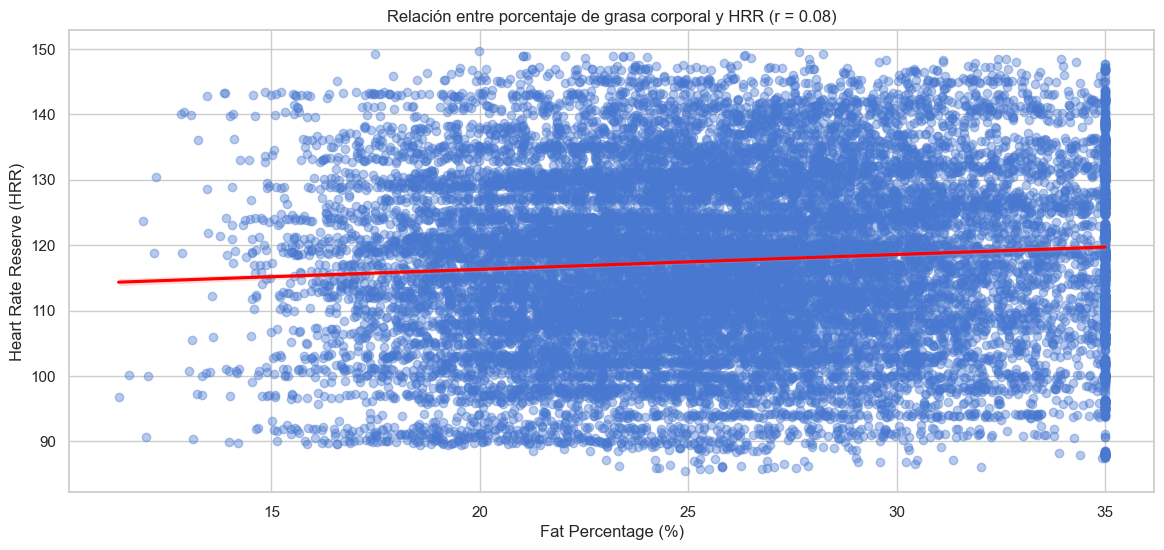

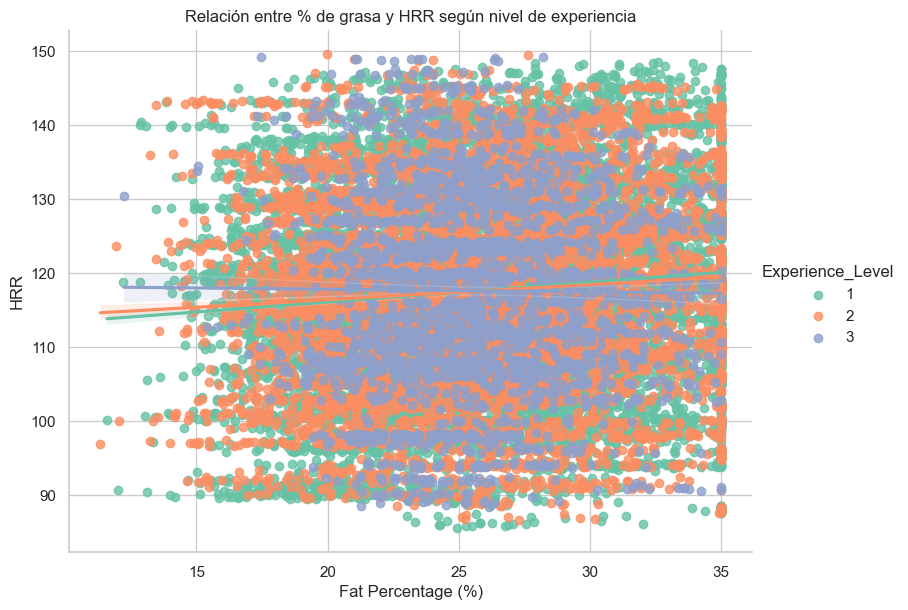

In [178]:
# Correlación simple
corr = df['Fat_Percentage'].corr(df['HRR'])
print(f"Correlación Fat_Percentage vs HRR: {corr:.3f}")

# Visualización general
sns.regplot(
    data=df,
    x='Fat_Percentage',
    y='HRR',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title(f'Relación entre porcentaje de grasa corporal y HRR (r = {corr:.2f})')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('Heart Rate Reserve (HRR)')
plt.show()

# Visualización por nivel de experiencia
sns.lmplot(
    data=df,
    x='Fat_Percentage',
    y='HRR',
    hue='Experience_Level',
    palette='Set2',
    height=6,
    aspect=1.3
)
plt.title('Relación entre % de grasa y HRR según nivel de experiencia')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('HRR')
plt.show()

#### **Pregunta 2:** ¿Las personas con menor nivel de experiencia tienen un ritmo cardíaco en reposo (Resting_BPM) más alto y una reserva cardíaca (HRR) más baja que las más experimentadas?

                  Resting_BPM     HRR
Experience_Level                     
1                       62.21  117.74
2                       62.09  117.65
3                       62.45  117.61


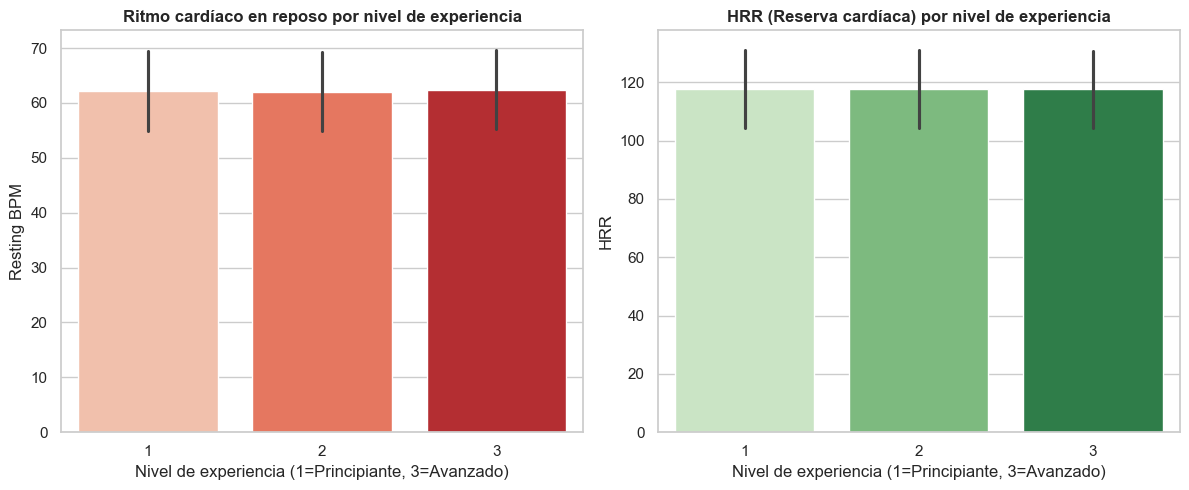

In [179]:
# RESUMEN DE MEDIAS POR NIVEL DE EXPERIENCIA
summary = df.groupby('Experience_Level')[['Resting_BPM', 'HRR']].mean().round(2)
print(summary)

# VISUALIZACIÓN CON GRÁFICOS DE BARRAS
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=df,
    x='Experience_Level',
    y='Resting_BPM',
    palette='Reds',
    ci='sd',
    ax=axes[0]
)
axes[0].set_title('Ritmo cardíaco en reposo por nivel de experiencia', fontweight='bold')
axes[0].set_xlabel('Nivel de experiencia (1=Principiante, 3=Avanzado)')
axes[0].set_ylabel('Resting BPM')

sns.barplot(
    data=df,
    x='Experience_Level',
    y='HRR',
    palette='Greens',
    ci='sd',
    ax=axes[1]
)
axes[1].set_title('HRR (Reserva cardíaca) por nivel de experiencia', fontweight='bold')
axes[1].set_xlabel('Nivel de experiencia (1=Principiante, 3=Avanzado)')
axes[1].set_ylabel('HRR')

plt.tight_layout()
plt.show()


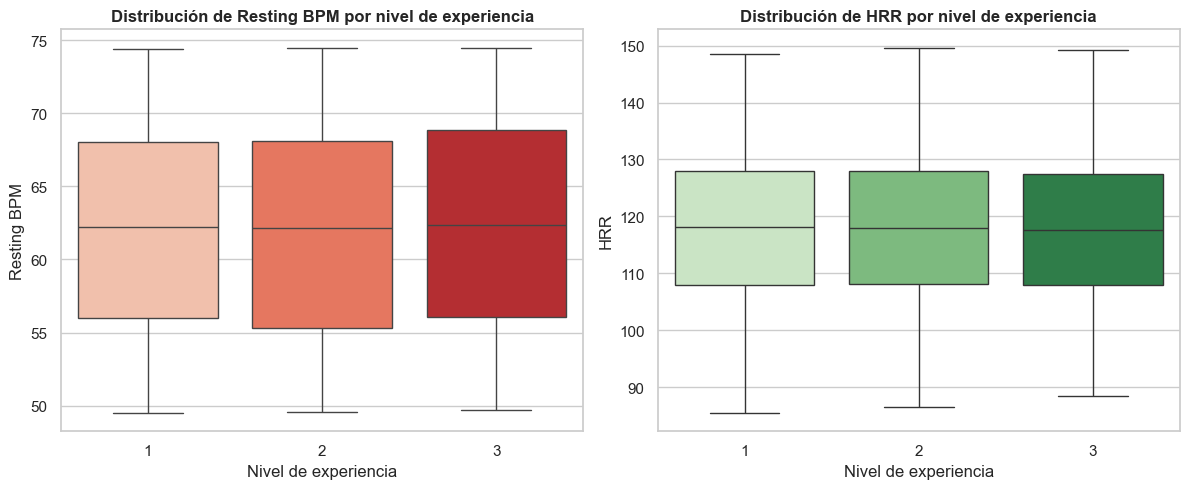

In [180]:
# DISTRIBUCIÓN INDIVIDUAL CON BOXPLOTS
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(
    data=df,
    x='Experience_Level',
    y='Resting_BPM',
    palette='Reds',
    ax=axes[0]
)
axes[0].set_title('Distribución de Resting BPM por nivel de experiencia', fontweight='bold')
axes[0].set_xlabel('Nivel de experiencia')
axes[0].set_ylabel('Resting BPM')

sns.boxplot(
    data=df,
    x='Experience_Level',
    y='HRR',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Distribución de HRR por nivel de experiencia', fontweight='bold')
axes[1].set_xlabel('Nivel de experiencia')
axes[1].set_ylabel('HRR')

plt.tight_layout()
plt.show()


In [181]:
# CORRELACIÓN NUMÉRICA
corr_rest = df['Experience_Level'].corr(df['Resting_BPM'])
corr_hrr = df['Experience_Level'].corr(df['HRR'])

print(f"Correlación Experience_Level vs Resting_BPM: {corr_rest:.3f}")
print(f"Correlación Experience_Level vs HRR: {corr_hrr:.3f}")


Correlación Experience_Level vs Resting_BPM: 0.005
Correlación Experience_Level vs HRR: -0.004


### 💪 Bloque B: Rendimiento de sesión


**Objetivo:** Evaluar qué factores influyen en el gasto energético y la intensidad del entrenamiento.

**Contexto:** El rendimiento durante una sesión de ejercicio depende de múltiples variables, como el tipo de entrenamiento, la experiencia del individuo y su capacidad cardiovascular. Analizar estas relaciones permite identificar qué factores determinan una mayor quema de calorías, si los entrenamientos más intensos (como HIIT) se traducen realmente en un gasto calórico superior, y si los niveles de experiencia afectan la eficiencia del esfuerzo realizado.

#### **Pregunta 1:** ¿Qué tipo de ejercicio tiende a quemar más calorías?

Workout_Type
HIIT        1652.533209
Strength    1361.430459
Cardio      1211.544680
Yoga         897.107216
Name: Calories_Burned, dtype: float64


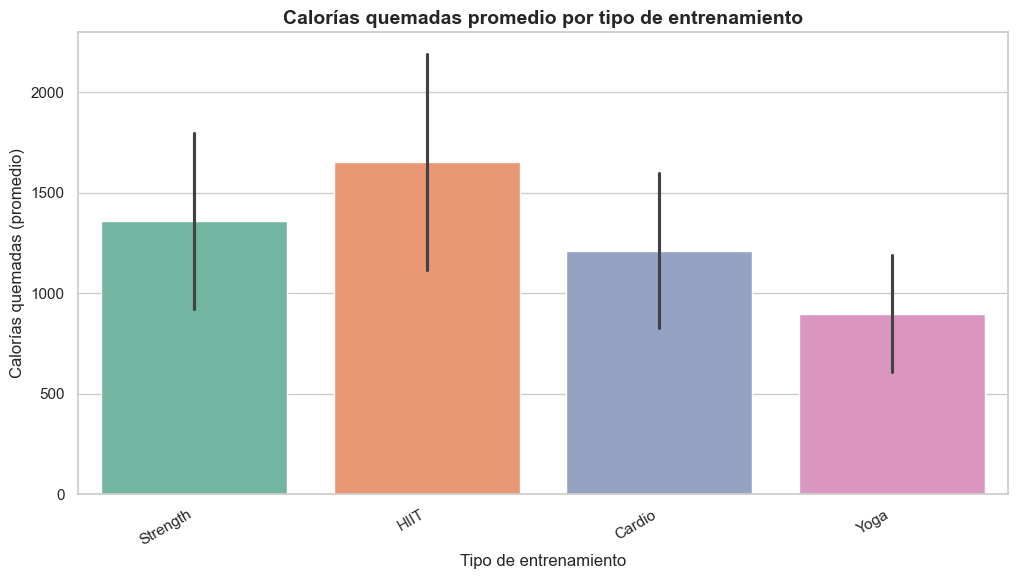

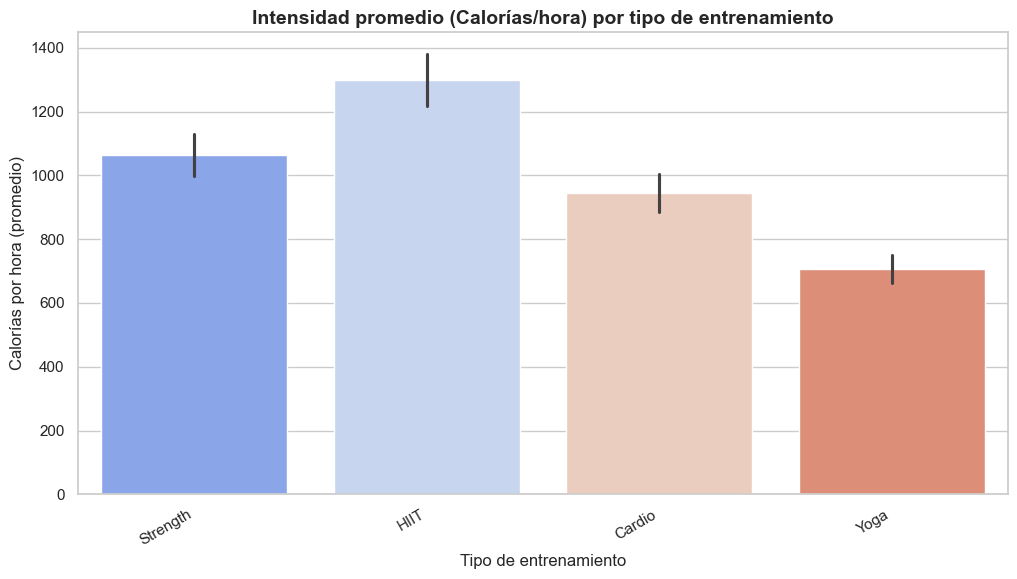

In [182]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# Promedio de calorías por tipo de entrenamiento
mean_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)
print(mean_calories)

# Visualización
sns.barplot(
    data=df,
    x='Workout_Type',
    y='Calories_Burned',
    estimator='mean',
    ci='sd',
    palette='Set2'
)

plt.title('Calorías quemadas promedio por tipo de entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de entrenamiento')
plt.ylabel('Calorías quemadas (promedio)')
plt.xticks(rotation=30, ha='right')
plt.show()

sns.barplot(
    data=df,
    x='Workout_Type',
    y='Calories_per_hour',
    estimator='mean',
    ci='sd',
    palette='coolwarm'
)

plt.title('Intensidad promedio (Calorías/hora) por tipo de entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de entrenamiento')
plt.ylabel('Calorías por hora (promedio)')
plt.xticks(rotation=30, ha='right')
plt.show()


#### **Pregunta 2:** ¿Las personas con menos experiencia (`Experience_Level`) queman más calorías por sesión que las avanzadas?

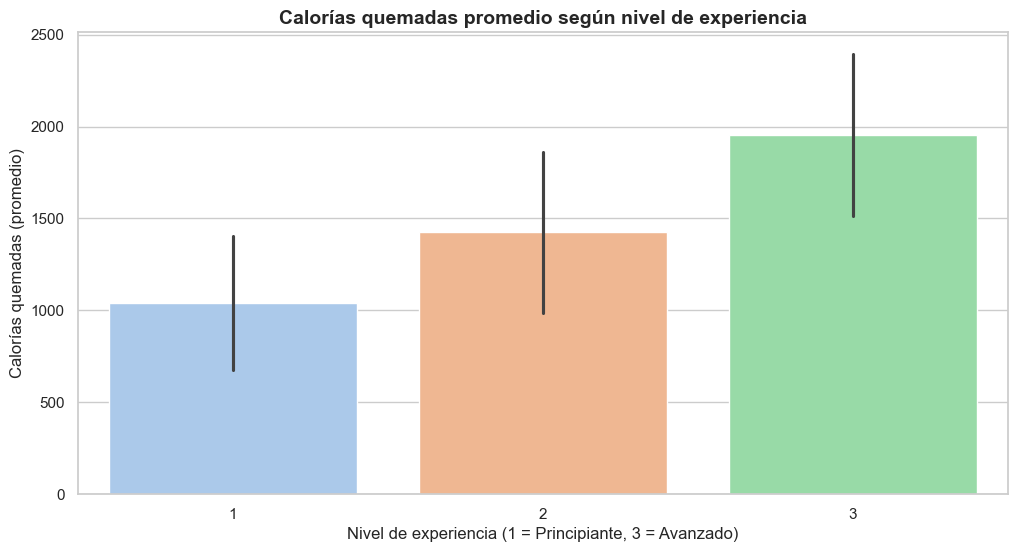

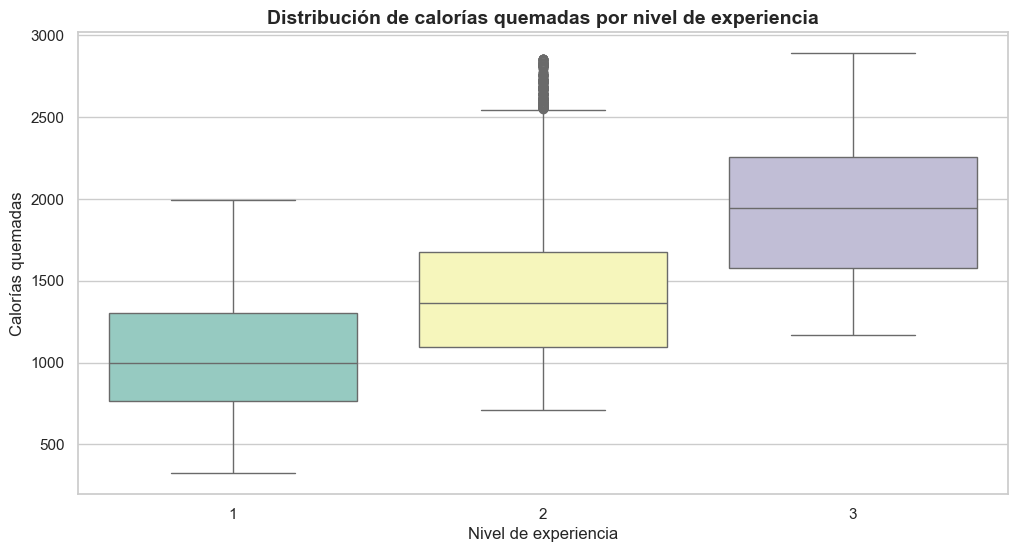

                  Calories_Burned  Calories_per_hour
Experience_Level                                    
1                         1040.55             955.65
2                         1423.52            1042.61
3                         1953.22            1107.33


In [183]:
sns.barplot(
    data=df,
    x='Experience_Level',
    y='Calories_Burned',
    estimator='mean',
    ci='sd',
    palette='pastel'
)
plt.title('Calorías quemadas promedio según nivel de experiencia', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de experiencia (1 = Principiante, 3 = Avanzado)')
plt.ylabel('Calorías quemadas (promedio)')
plt.show()


sns.boxplot(
    data=df,
    x='Experience_Level',
    y='Calories_Burned',
    palette='Set3'
)
plt.title('Distribución de calorías quemadas por nivel de experiencia', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Calorías quemadas')
plt.show()


summary = df.groupby('Experience_Level')[['Calories_Burned', 'Calories_per_hour']].mean().round(2)
print(summary)




#### **Matriz de correlación**

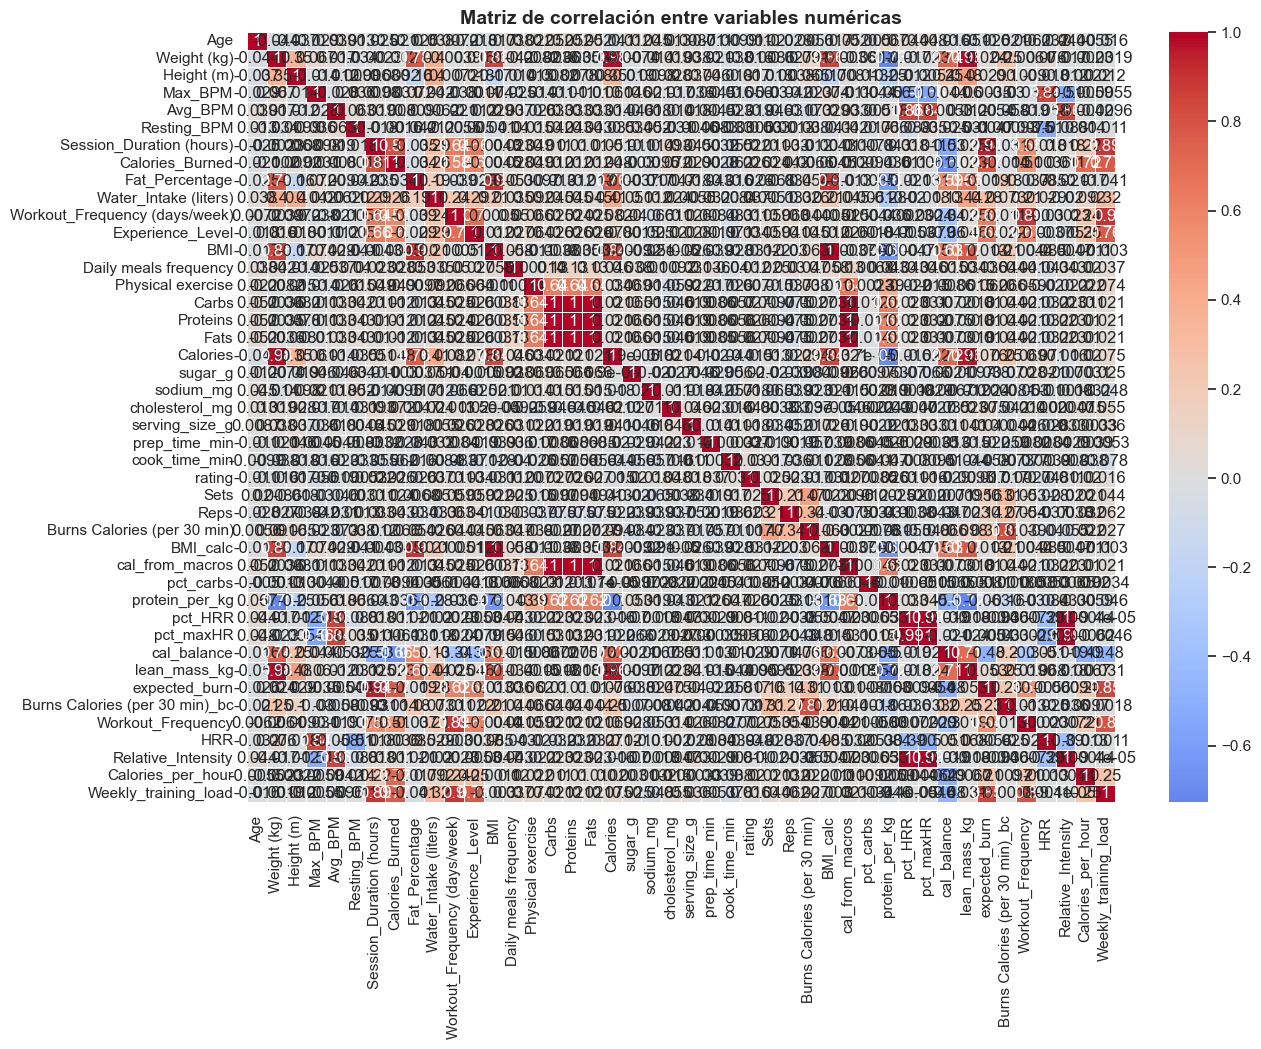

In [184]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = df_numeric.corr()

# Visualización con Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Matriz de correlación entre variables numéricas', fontsize=14, fontweight='bold')
plt.show()

**Conclusión:** (Interpretación clara del resultado)

### ⚖️ Bloque D: Perfil general de los participantes

**Objetivo:** Comprender el perfil dominante en el dataset y analizar las diferencias entre grupos.

**Contexto:** Explorar las variables demográficas y de estilo de vida permite identificar el perfil general de los individuos del dataset: si son más bien sedentarios o activos, si entrenan con regularidad y si su balance energético es positivo o negativo.

Además, observar las diferencias entre hombres y mujeres en cuanto a frecuencia de entrenamiento, tipo de ejercicios y gasto calórico puede revelar tendencias interesantes sobre los hábitos de entrenamiento y alimentación.

**Pregunta 1:** ¿Predominan sujetos con un estilo de vida activo o sedentario?  
**Pregunta 2:** ¿Entrenan con más frecuencia los hombres o las mujeres? (`Gender` vs `Workout_Frequency`)  
**Pregunta 3:** ¿Qué tipo de ejercicio prefieren los hombres y las mujeres? (`Gender` vs `Workout_Type`)  
**Pregunta 4:** ¿La mayoría de los sujetos están en superávit o déficit calórico? (`Energy_balance`)

**📊 Análisis sugerido:**  
- Gráficos de barras y conteo (`sns.countplot`, `sns.barplot`) para comparar grupos por género o hábitos.  
- Cálculo de estadísticas descriptivas de `Workout_Frequency` por `Gender`.  
- Histograma de `Energy_balance` para visualizar la distribución entre déficit y superávit calórico.  
- Comparación de medias y medianas para determinar diferencias significativas entre grupos.

**Conclusión:** (Interpretación clara del resultado)

## 8️⃣ **Modelado predictivo:** estimación de calorías quemadas

En esta fase, se desarrolla un modelo predictivo cuyo objetivo es **estimar la cantidad de calorías quemadas (`Calories_Burned`)** durante una sesión de entrenamiento a partir de distintos factores fisiológicos, demográficos y de rendimiento.

El gasto calórico depende de múltiples variables: edad, peso, frecuencia cardíaca, duración e intensidad del ejercicio, entre otras.  
Mediante el uso de técnicas de aprendizaje supervisado (regresión), se busca construir un modelo que sea capaz de **predecir de forma aproximada las calorías quemadas** en función de dichas variables, y así comprender cuáles son los factores que más influyen en el rendimiento energético.

Para ello, se seleccionan como variables explicativas (`features`) aquellas que, por su naturaleza, tienen relación directa con el gasto calórico:

- **Edad (`Age`)**: influye en el metabolismo y en la eficiencia energética.  
- **Peso (`Weight (kg)`) y Altura (`Height (m)`)**: determinan la masa corporal total y el gasto energético basal.  
- **Frecuencias cardíacas (`Avg_BPM`, `Max_BPM`, `Resting_BPM`)**: reflejan el esfuerzo e intensidad durante el entrenamiento.  
- **Duración de la sesión (`Session_Duration (hours)`)**: influye directamente en el volumen total del esfuerzo.  
- **Tipo de entrenamiento (`Workout_Type`)**: distingue entre modalidades (por ejemplo, fuerza, cardio o HIIT) que tienen diferentes demandas energéticas.  
- **Intensidad relativa (`Relative_Intensity`)**: mide la proporción de esfuerzo realizado respecto a la capacidad máxima del individuo.  
- **Nivel de experiencia (`Experience_Level`)**: puede afectar la eficiencia con la que se realiza el ejercicio.  
- **Carga semanal (`Weekly_training_load`)**: combina frecuencia y duración para reflejar el volumen total de entrenamiento.

La variable objetivo (`target`) será `Calories_Burned`, que representa el **total de calorías consumidas en una sesión**.

Antes de entrenar el modelo, se realiza una **preparación del dataset** que incluye:
1. **Selección de variables relevantes.**  
2. **Codificación de variables categóricas** (como `Workout_Type`).  
3. **División en conjuntos de entrenamiento y prueba** para evaluar el rendimiento del modelo.  
4. **Escalado de las variables numéricas** para normalizar los rangos y mejorar la estabilidad del modelo.

A continuación, se muestra el proceso de preparación de los datos previo al entrenamiento.


In [185]:
# 1. Seleccionar variables relevantes
features = [
    'Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Max_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Relative_Intensity', 'Experience_Level',
    'Weekly_training_load', 'Workout_Type'
]
target = 'Calories_Burned'

X = df[features].copy()
y = df[target]

# 2. Convertir variables categóricas (como Workout_Type) a numéricas
X = pd.get_dummies(X, columns=['Workout_Type'], drop_first=True)

# 3. Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalar variables numéricas (importante para regresiones)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 📈 8.3 Regresión Lineal Simple

Antes de aplicar modelos complejos, se comienza con una **regresión lineal simple** para comprender la relación directa entre una única variable predictora y la variable objetivo.

En este caso, se analiza la relación entre la **duración de la sesión de entrenamiento (`Session_Duration (hours)`)** y las **calorías quemadas (`Calories_Burned`)**.

Este tipo de modelo permite observar si existe una tendencia lineal clara: es decir, si al aumentar la duración del entrenamiento, el gasto calórico aumenta de forma proporcional.

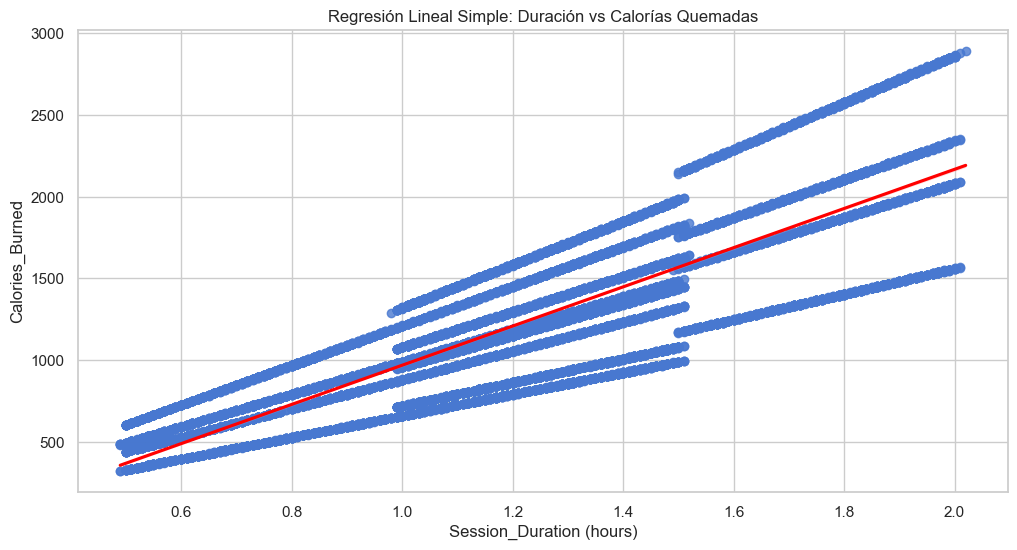

R²: 0.663


In [186]:
# Entrenamiento con una sola variable
X_simple = df[['Session_Duration (hours)']]
y = df['Calories_Burned']

model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Predicciones
y_pred_simple = model_simple.predict(X_simple)

# Visualización
sns.regplot(x='Session_Duration (hours)', y='Calories_Burned', data=df, line_kws={'color':'red'})
plt.title('Regresión Lineal Simple: Duración vs Calorías Quemadas')
plt.show()

# Coeficiente de determinación
print(f"R²: {model_simple.score(X_simple, y):.3f}")

### 📊 8.4 Regresión Lineal Múltiple

Una vez analizada la relación individual entre la duración de la sesión y el gasto calórico, se amplía el modelo para incorporar **todas las variables predictoras relevantes**.

El objetivo es construir un modelo que pueda estimar las calorías quemadas (`Calories_Burned`) en función de variables demográficas, fisiológicas y de entrenamiento, incluyendo:

- Peso, altura y edad.  
- Frecuencias cardíacas promedio, máxima y en reposo.  
- Duración e intensidad de la sesión.  
- Nivel de experiencia y tipo de entrenamiento.

Este enfoque multivariable permite capturar mejor la complejidad del fenómeno, ya que las calorías quemadas dependen de múltiples factores simultáneamente.

A continuación, se entrena el modelo y se evalúan sus resultados utilizando métricas estándar:
- **MAE (Error Absoluto Medio)**: promedio de los errores en unidades originales.  
- **RMSE (Raíz del Error Cuadrático Medio)**: penaliza errores grandes.  
- **R² (Coeficiente de determinación)**: indica qué porcentaje de la variabilidad en `Calories_Burned` es explicado por el modelo.

scikit-learn version: 1.7.2
MAE:  67.552
RMSE: 95.339
R²:   0.964


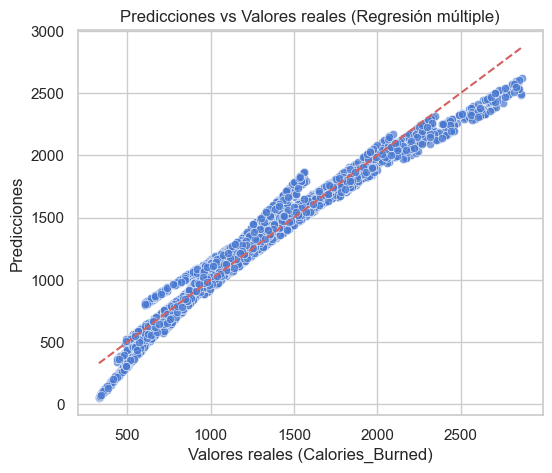


Coeficientes ordenados por importancia:


,Variable,Coeficiente
6,Session_Duration (hours),318.837090
10,Workout_Type_HIIT,195.539650
12,Workout_Type_Yoga,-128.282363
9,Weekly_training_load,74.818735
11,Workout_Type_Strength,66.005485
8,Experience_Level,33.937450
7,Relative_Intensity,28.875428
3,Avg_BPM,-24.678854
4,Max_BPM,13.853046
5,Resting_BPM,5.155117


In [187]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn

print("scikit-learn version:", sklearn.__version__)

model_multi = LinearRegression()
model_multi.fit(X_train_scaled, y_train)

# Predicciones
y_pred_multi = model_multi.predict(X_test_scaled)

# Métricas (compatibles con todas las versiones)
mae = mean_absolute_error(y_test, y_pred_multi)

# Intento moderno; si falla, cálculo manual del RMSE
try:
    rmse = mean_squared_error(y_test, y_pred_multi, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi))

r2 = r2_score(y_test, y_pred_multi)

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

# Visualización: predicciones vs valores reales
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_multi, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales (Calories_Burned)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales (Regresión múltiple)")
plt.show()

# Importancia de variables (coeficientes absolutos)
coef_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model_multi.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\nCoeficientes ordenados por importancia:")
display(coef_importance.head(10))

## 9️⃣ **Regularización (Ridge y Lasso) + Validación cruzada**

En este apartado aplicamos técnicas de **regularización** para mejorar la capacidad predictiva del modelo lineal y reducir el riesgo de **sobreajuste**.  
Las regresiones **Ridge** y **Lasso** añaden un término de penalización a los coeficientes del modelo, controlando su magnitud:

- **Ridge (L2):** penaliza la suma de los cuadrados de los coeficientes. Tiende a reducir su tamaño sin anularlos.
- **Lasso (L1):** puede reducir algunos coeficientes exactamente a cero, actuando como un método de *selección automática de variables*.

Ambos modelos se evaluarán mediante **validación cruzada (cross-validation)** para obtener una estimación más robusta del rendimiento general del modelo.

,Modelo,R²,RMSE
0,Linear,0.963552,95.339140
1,Ridge,0.963552,95.339279
2,Lasso,0.963552,95.338871


Mejor alpha Ridge: 1.0
Mejor alpha Lasso: 0.001


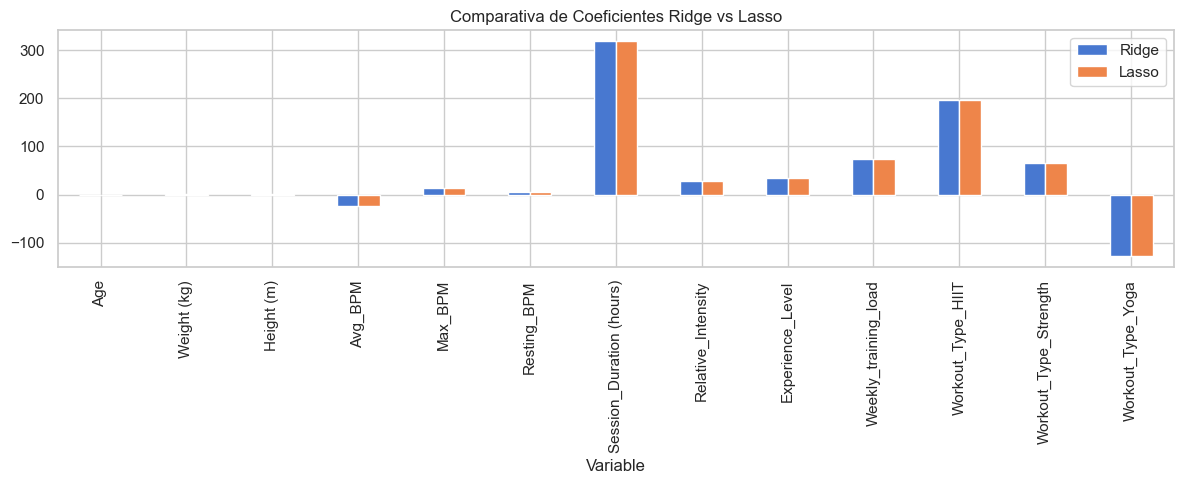

In [188]:
from sklearn.linear_model import RidgeCV, LassoCV

# Ridge Regression (regulariza la magnitud de los coeficientes)
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge.fit(X_train_scaled, y_train)

# Lasso Regression (puede eliminar variables poco relevantes)
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0], cv=5, max_iter=5000, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Evaluación
models = {
    "Linear": model_multi,
    "Ridge": ridge,
    "Lasso": lasso
}

results = []
for name, m in models.items():
    y_pred = m.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, rmse])

results_df = pd.DataFrame(results, columns=["Modelo", "R²", "RMSE"])
display(results_df)

print(f"Mejor alpha Ridge: {ridge.alpha_}")
print(f"Mejor alpha Lasso: {lasso.alpha_}")

# Visualizar coeficientes
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}).set_index('Variable')

coef_df.plot(kind='bar', figsize=(12,5), title='Comparativa de Coeficientes Ridge vs Lasso')
plt.tight_layout()
plt.show()


## 🔟 **Árboles de regresión y ajuste de hiperparámetros**

En esta sección entrenamos un **árbol de regresión**, un modelo no lineal que divide los datos en ramas según las variables que mejor predicen el valor objetivo (`Calories_Burned`).  
Los árboles permiten capturar **relaciones no lineales** entre las variables y detectar interacciones entre características.

Se construirá un modelo base y luego se aplicará un proceso de **ajuste de hiperparámetros (GridSearchCV)** para optimizar parámetros clave como:
- Profundidad máxima del árbol (`max_depth`)
- Mínimo de muestras por división (`min_samples_split`)
- Mínimo de muestras por hoja (`min_samples_leaf`)

Finalmente, se analizará la **importancia de las variables** y se evaluará la mejora obtenida tras el ajuste.

Árbol base -> R² train: 1.000, R² test: 0.999, RMSE: 17.28

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Árbol optimizado -> R² train: 1.000, R² test: 0.999, RMSE: 17.28


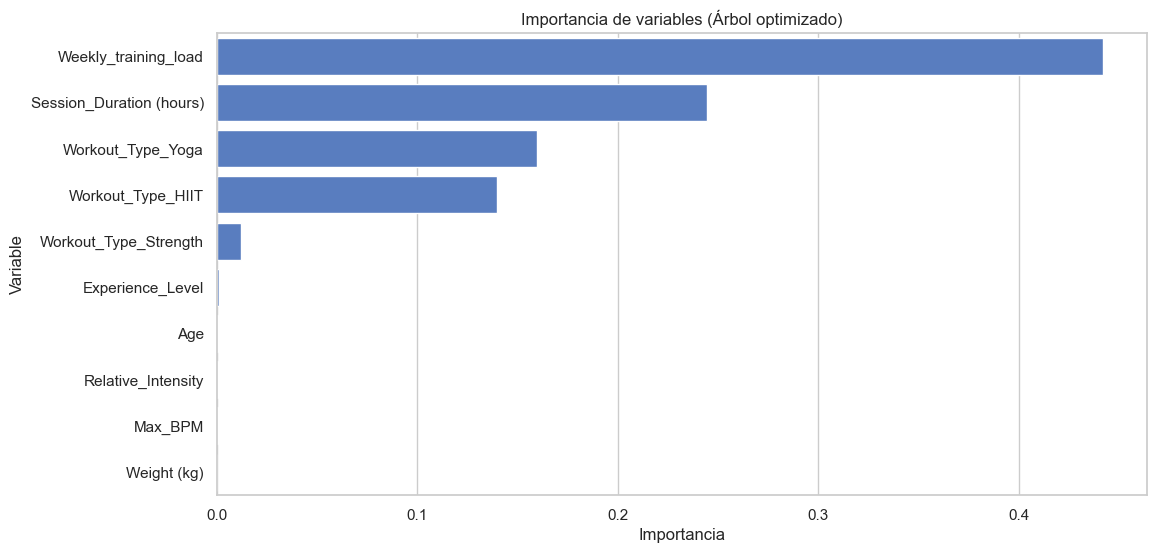

In [189]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

# Árbol base
tree_base = DecisionTreeRegressor(random_state=42)
tree_base.fit(X_train, y_train)

r2_train_base = tree_base.score(X_train, y_train)
r2_test_base = tree_base.score(X_test, y_test)
rmse_base = np.sqrt(mean_squared_error(y_test, tree_base.predict(X_test)))

print(f"Árbol base -> R² train: {r2_train_base:.3f}, R² test: {r2_test_base:.3f}, RMSE: {rmse_base:.2f}")

# Grid Search para optimización
params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print("\nMejores hiperparámetros:", grid_tree.best_params_)

# Evaluación
r2_train = best_tree.score(X_train, y_train)
r2_test = best_tree.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, best_tree.predict(X_test)))

print(f"Árbol optimizado -> R² train: {r2_train:.3f}, R² test: {r2_test:.3f}, RMSE: {rmse:.2f}")

# Importancia de variables
importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': best_tree.feature_importances_
}).sort_values('Importancia', ascending=False)

sns.barplot(x='Importancia', y='Variable', data=importances.head(10))
plt.title("Importancia de variables (Árbol optimizado)")
plt.show()


## 1️⃣1️⃣ **Random Forest vs Gradient Boosting**

En este bloque comparamos dos métodos avanzados de *ensemble learning* que combinan múltiples árboles de decisión para lograr predicciones más estables y precisas.

- **Random Forest:** construye muchos árboles independientes sobre subconjuntos aleatorios de datos y promedia sus predicciones. Reduce el sobreajuste y mejora la generalización.
- **Gradient Boosting:** entrena árboles de forma secuencial, donde cada nuevo árbol corrige los errores de los anteriores, logrando un modelo más afinado.

Ambos modelos se entrenarán con las mismas variables predictoras del modelo lineal, y se evaluarán mediante:
- Coeficiente de determinación (**R²**)
- Raíz del error cuadrático medio (**RMSE**)
- Validación cruzada (**CV**)

Finalmente, se comparará el rendimiento y la importancia de las variables en ambos métodos para determinar cuál explica mejor las calorías quemadas.

Random Forest R²: 0.9993389165890451
Gradient Boosting R²: 0.9978089185449315


,Modelo,R² Test,RMSE Test,R² CV
0,Random Forest,0.999339,12.839896,0.999172
1,Gradient Boosting,0.997809,23.375593,0.997844


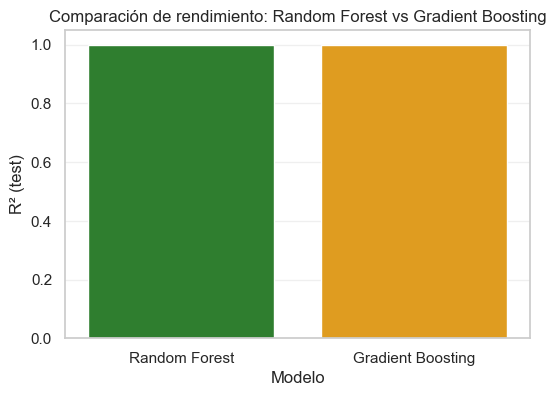

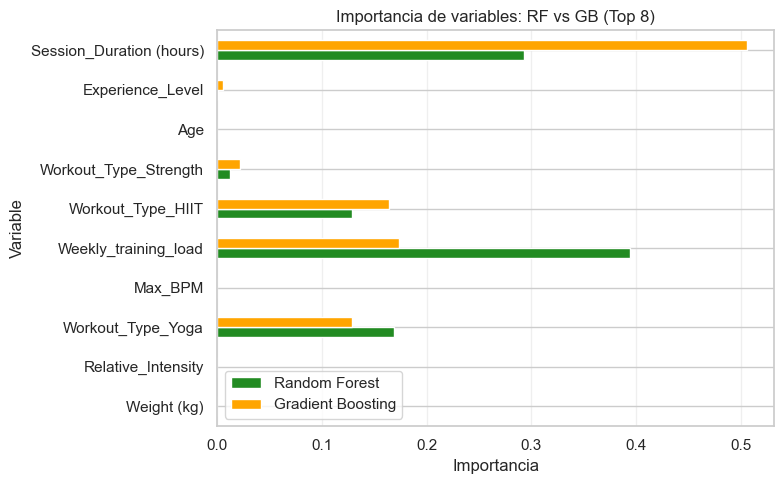

In [190]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))

# Métricas
def evaluate_model(name, y_true, y_pred, model):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    cv = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return [name, r2, rmse, cv]

results = [
    evaluate_model("Random Forest", y_test, y_pred_rf, rf),
    evaluate_model("Gradient Boosting", y_test, y_pred_gb, gb)
]

results_df = pd.DataFrame(results, columns=["Modelo", "R² Test", "RMSE Test", "R² CV"])
display(results_df)

# 📊 Comparación de R²
plt.figure(figsize=(6,4))
sns.barplot(x='Modelo', y='R² Test', data=results_df, palette=['forestgreen', 'orange'])
plt.title("Comparación de rendimiento: Random Forest vs Gradient Boosting")
plt.ylabel("R² (test)")
plt.grid(axis='y', alpha=0.3)
plt.show()

# 🌿 Feature Importance
rf_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

gb_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': gb.feature_importances_
}).sort_values('Importancia', ascending=False)

# Gráfico comparativo de importancia (top 8)
top_features = set(rf_importance.head(8)['Variable']) | set(gb_importance.head(8)['Variable'])
comparison = pd.DataFrame({
    'Variable': list(top_features),
    'Random Forest': [rf_importance.set_index('Variable').loc[var, 'Importancia'] if var in rf_importance['Variable'].values else 0 for var in top_features],
    'Gradient Boosting': [gb_importance.set_index('Variable').loc[var, 'Importancia'] if var in gb_importance['Variable'].values else 0 for var in top_features]
}).set_index('Variable')

comparison.plot(kind='barh', figsize=(8,5), color=['forestgreen', 'orange'])
plt.title("Importancia de variables: RF vs GB (Top 8)")
plt.xlabel("Importancia")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 📢 **Conclusiones finales**